In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

In [2]:
# Url to retrieve data
covid_url = (
    "https://www.data.gouv.fr/fr/datasets/r/0b66ca39-1623-4d9c-83ad-5434b7f9e2a4"
)

In [3]:
# Get Data
df = pd.read_csv(covid_url, sep=",", parse_dates=['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8715 entries, 0 to 8714
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 8715 non-null   datetime64[ns]
 1   granularite          8715 non-null   object        
 2   maille_code          8715 non-null   object        
 3   maille_nom           8715 non-null   object        
 4   cas_confirmes        2786 non-null   float64       
 5   cas_ehpad            19 non-null     float64       
 6   cas_confirmes_ehpad  20 non-null     float64       
 7   cas_possibles_ehpad  15 non-null     float64       
 8   deces                7203 non-null   float64       
 9   deces_ehpad          32 non-null     float64       
 10  reanimation          6021 non-null   float64       
 11  hospitalises         6103 non-null   float64       
 12  gueris               5989 non-null   float64       
 13  depistes             49 non-null 

In [4]:
# https://www.tutorialspoint.com/python_pandas/python_pandas_groupby.htm
regions_df = df.groupby(["maille_code"])
french_df = regions_df.get_group("FRA")

In [5]:
# Display First rows
french_df.head()

,date,granularite,maille_code,maille_nom,cas_confirmes,cas_ehpad,cas_confirmes_ehpad,cas_possibles_ehpad,deces,deces_ehpad,reanimation,hospitalises,gueris,depistes,source_nom,source_url,source_archive,source_type
13,2020-01-24,pays,FRA,France,3.0,NaN,NaN,NaN,0.0,NaN,NaN,3.0,NaN,NaN,Santé publique France,https://www.santepubliquefrance.fr/maladies-et...,https://web.archive.org/web/20200124202351/htt...,sante-publique-france
14,2020-01-24,pays,FRA,France,3.0,NaN,NaN,NaN,0.0,NaN,NaN,3.0,NaN,NaN,Ministère des Solidarités et de la Santé,https://solidarites-sante.gouv.fr/IMG/pdf/2001...,https://web.archive.org/web/20200322183046/htt...,ministere-sante
22,2020-01-25,pays,FRA,France,3.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Santé publique France,https://www.santepubliquefrance.fr/maladies-et...,https://web.archive.org/web/20200126024644/htt...,sante-publique-france
27,2020-01-26,pays,FRA,France,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Santé publique France,https://www.santepubliquefrance.fr/maladies-et...,https://web.archive.org/web/20200127144431/htt...,sante-publique-france
33,2020-01-27,pays,FRA,France,3.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Santé publique France,https://www.santepubliquefrance.fr/maladies-et...,https://web.archive.org/web/20200128153608/htt...,sante-publique-france


In [6]:
# Filter Data
countries_and_confirmed_more100 = np.logical_and(french_df["cas_confirmes"].notna(), french_df["cas_confirmes"]> 100)
data_national = french_df.loc[countries_and_confirmed_more100,:]
data_national = data_national.drop_duplicates('date',keep='first')
data_national

,date,granularite,maille_code,maille_nom,cas_confirmes,cas_ehpad,cas_confirmes_ehpad,cas_possibles_ehpad,deces,deces_ehpad,reanimation,hospitalises,gueris,depistes,source_nom,source_url,source_archive,source_type
245,2020-03-01,pays,FRA,France,130.0,NaN,NaN,NaN,2.0,NaN,9.0,116.0,12.0,NaN,Ministère des Solidarités et de la Santé,https://www.dailymotion.com/video/x7sedoy,NaN,ministere-sante
270,2020-03-02,pays,FRA,France,178.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,Santé publique France,https://www.santepubliquefrance.fr/maladies-et...,https://web.archive.org/web/20200303124836/htt...,sante-publique-france
326,2020-03-03,pays,FRA,France,212.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,Santé publique France,https://www.santepubliquefrance.fr/maladies-et...,https://web.archive.org/web/20200303185725/htt...,sante-publique-france
410,2020-03-04,pays,FRA,France,285.0,NaN,NaN,NaN,4.0,NaN,15.0,NaN,NaN,NaN,Santé publique France,https://www.santepubliquefrance.fr/content/dow...,https://web.archive.org/web/20200305181330/htt...,sante-publique-france
507,2020-03-05,pays,FRA,France,423.0,NaN,NaN,NaN,5.0,NaN,23.0,NaN,NaN,NaN,Santé publique France,https://www.santepubliquefrance.fr/content/dow...,NaN,sante-publique-france
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8211,2020-04-28,pays,FRA,France,129859.0,69893.0,30817.0,39076.0,14810.0,8850.0,4387.0,27484.0,46886.0,NaN,Ministère des Solidarités et de la Santé,NaN,NaN,ministere-sante
8332,2020-04-29,pays,FRA,France,128442.0,69773.0,31795.0,NaN,15053.0,9034.0,4207.0,26834.0,48228.0,NaN,Ministère des Solidarités et de la Santé,NaN,NaN,ministere-sante
8453,2020-04-30,pays,FRA,France,129581.0,69952.0,32355.0,NaN,15244.0,9132.0,4019.0,26283.0,49476.0,NaN,Ministère des Solidarités et de la Santé,NaN,NaN,ministere-sante
8574,2020-05-01,pays,FRA,France,130185.0,69952.0,32791.0,NaN,15369.0,9225.0,3878.0,25887.0,50212.0,NaN,Ministère des Solidarités et de la Santé,NaN,NaN,ministere-sante


In [7]:
# Compute new cases
cases = np.array((list(data_national["cas_confirmes"])))
new_cases = cases[1:] - cases[:-1]
new_cases = np.insert(new_cases, 0, cases[0])

In [8]:
# Ajouter les nouveaux cas confirmes
cpt = 0
for lab, row in data_national.iterrows():
    data_national.loc[lab, "nouveaux_cas_confirmes"] = new_cases[cpt]
    cpt+=1

Text(0.5, 1.0, 'Evolution du nombre de nouveaux cas par jour')

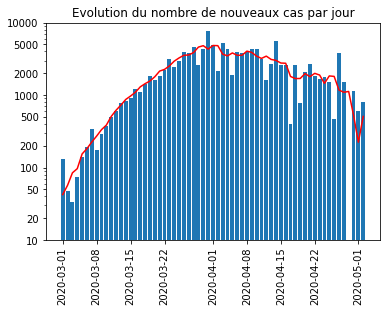

In [9]:
# Display new cases
dfig, ax = plt.subplots()
ax.bar(data_national["date"], data_national["nouveaux_cas_confirmes"])
N = 5
ax.plot(data_national["date"], np.convolve(new_cases, np.ones((N,))/N, mode='same'), color='r')
ax.set_yscale('log')
ax.set_yticks([10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000])
ax.get_yaxis().set_major_formatter(ScalarFormatter())
plt.xticks(rotation=90)
plt.title("Evolution du nombre de nouveaux cas par jour")

In [10]:
# Compute new cases
deaths = np.array((list(data_national["deces"])))
new_deaths = deaths[1:] - deaths[:-1]
new_deaths = np.insert(new_deaths, 0, deaths[0])

In [11]:
# Ajouter les nouveaux cas confirmes
cpt = 0
for lab, row in data_national.iterrows():
    data_national.loc[lab, "nouveaux_deces"] = new_deaths[cpt]
    cpt+=1

Text(0.5, 1.0, 'Evolution du nombre de décès par jour')

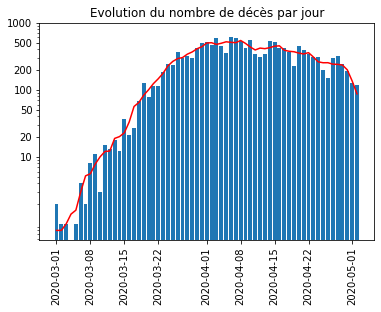

In [12]:
# Display new cases
dfig, ax = plt.subplots()
ax.bar(data_national["date"], data_national["nouveaux_deces"])
N = 5
ax.plot(data_national["date"], np.convolve(new_deaths, np.ones((N,))/N, mode='same'), color='r')
ax.set_yscale('log')
ax.set_yticks([10, 20, 50, 100, 200, 500, 1000])
ax.get_yaxis().set_major_formatter(ScalarFormatter())
plt.xticks(rotation=90)
plt.title("Evolution du nombre de décès par jour")